1.1. Należy wczytać dane.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('iris.csv')

1.2. Sprawdzić podstawowe statystyki.

In [4]:
statystyki = df.describe()

print(statystyki)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


1.3. Sprawdzić kompletność danych.

In [5]:
brakujace = df.isnull().sum()
print(brakujace)

print(df.isnull().values.any())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
False


1.4. Przeprowadzić normalizację danych w zakresie [0,1] na kolumnach (z wyłączeniem
kolumny species).

In [6]:
# Wyłączenie kolumny species do normalizacji
kolumny_do_normalizacji = df.columns.drop('species')

scaler = MinMaxScaler()

df[kolumny_do_normalizacji] = scaler.fit_transform(df[kolumny_do_normalizacji])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


1.5. Przeprowadzić normalizację danych w zakresie [-1,1] na kolumnach (z wyłączeniem
kolumny species)

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))

df[kolumny_do_normalizacji] = scaler.fit_transform(df[kolumny_do_normalizacji])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.555556     0.250000     -0.864407    -0.916667  setosa
1     -0.666667    -0.166667     -0.864407    -0.916667  setosa
2     -0.777778     0.000000     -0.898305    -0.916667  setosa
3     -0.833333    -0.083333     -0.830508    -0.916667  setosa
4     -0.611111     0.333333     -0.864407    -0.916667  setosa


1.6. Przeprowadzić standaryzację danych na kolumnach (z wyłączeniem kolumny
species).

In [8]:
scaler = StandardScaler()

kolumny_do_standaryzacji = df.columns.drop('species')

df[kolumny_do_standaryzacji] = scaler.fit_transform(df[kolumny_do_standaryzacji])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.032057     -1.341272    -1.312977  setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  setosa
2     -1.385353     0.337848     -1.398138    -1.312977  setosa
3     -1.506521     0.106445     -1.284407    -1.312977  setosa
4     -1.021849     1.263460     -1.341272    -1.312977  setosa


1.7. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości płatka
[cm] od szerokości płatka [cm] różnicowany na podstawie gatunku dla danych
pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w zakresie [-
1,1] oraz standaryzowanych.

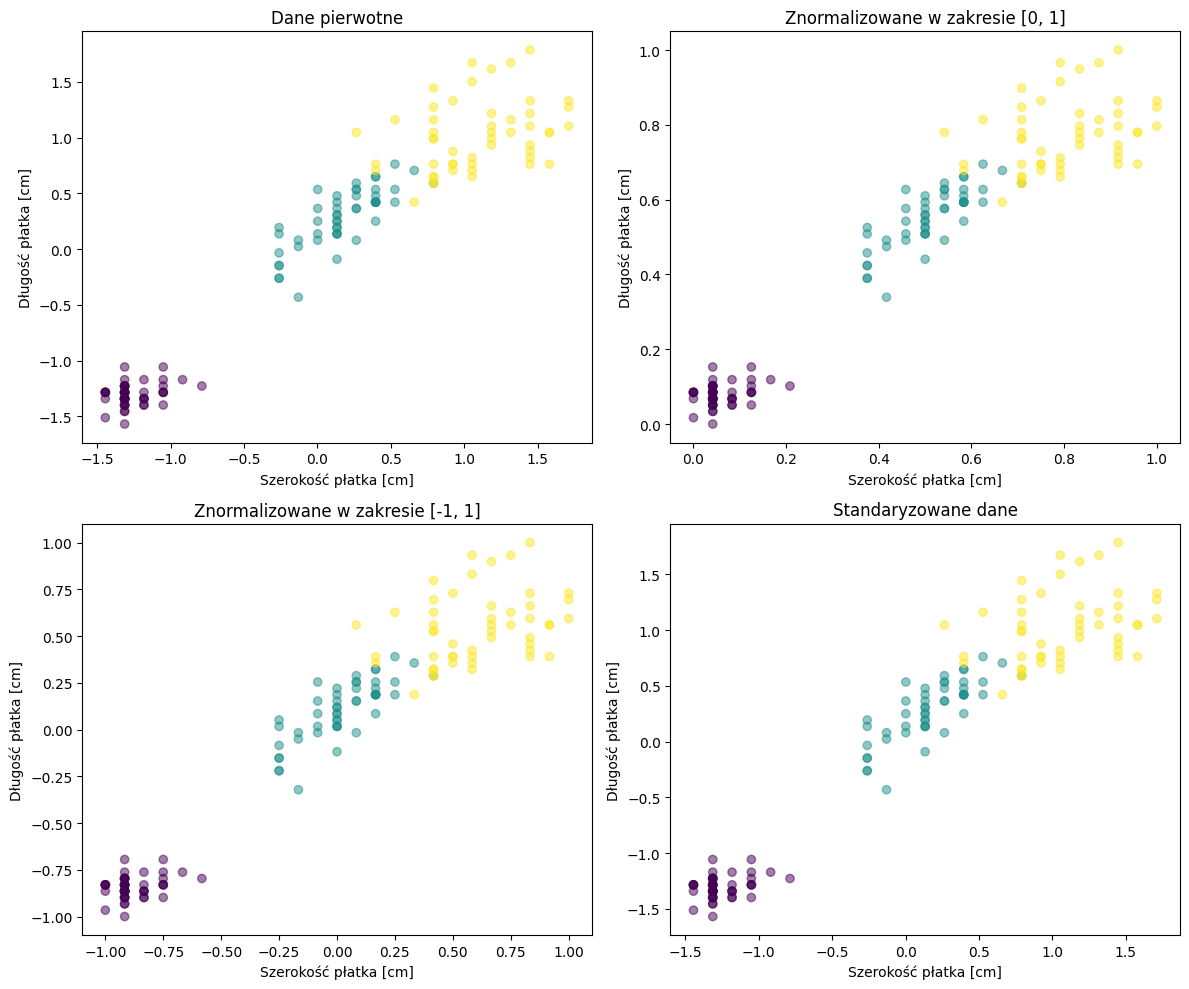

In [9]:
# Zbiorcze dane pierwotne
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Pierwotne dane
axs[0, 0].scatter(df['petal_width'], df['petal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 0].set_title('Dane pierwotne')
axs[0, 0].set_xlabel('Szerokość płatka [cm]')
axs[0, 0].set_ylabel('Długość płatka [cm]')

# Znormalizowane dane w zakresie [0,1]
scaler_01 = MinMaxScaler(feature_range=(0, 1))
df_01 = df.copy()
df_01[kolumny_do_normalizacji] = scaler_01.fit_transform(df_01[kolumny_do_normalizacji])

axs[0, 1].scatter(df_01['petal_width'], df_01['petal_length'], c=df_01['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 1].set_title('Znormalizowane w zakresie [0, 1]')
axs[0, 1].set_xlabel('Szerokość płatka [cm]')
axs[0, 1].set_ylabel('Długość płatka [cm]')

# Znormalizowane dane w zakresie [-1,1]
scaler_neg_1_1 = MinMaxScaler(feature_range=(-1, 1))
df_neg_1_1 = df.copy()
df_neg_1_1[kolumny_do_normalizacji] = scaler_neg_1_1.fit_transform(df_neg_1_1[kolumny_do_normalizacji])

axs[1, 0].scatter(df_neg_1_1['petal_width'], df_neg_1_1['petal_length'], c=df_neg_1_1['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 0].set_title('Znormalizowane w zakresie [-1, 1]')
axs[1, 0].set_xlabel('Szerokość płatka [cm]')
axs[1, 0].set_ylabel('Długość płatka [cm]')

# Standaryzowane dane
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[kolumny_do_normalizacji] = scaler.fit_transform(df_standardized[kolumny_do_normalizacji])

axs[1, 1].scatter(df_standardized['petal_width'], df_standardized['petal_length'], c=df_standardized['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 1].set_title('Standaryzowane dane')
axs[1, 1].set_xlabel('Szerokość płatka [cm]')
axs[1, 1].set_ylabel('Długość płatka [cm]')

# Ustawienia layoutu
plt.tight_layout()
plt.show()

1.8. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości
kielicha [cm] od szerokości kielicha [cm] różnicowany na podstawie gatunku dla
danych pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w
zakresie [-1,1] oraz standaryzowanych.

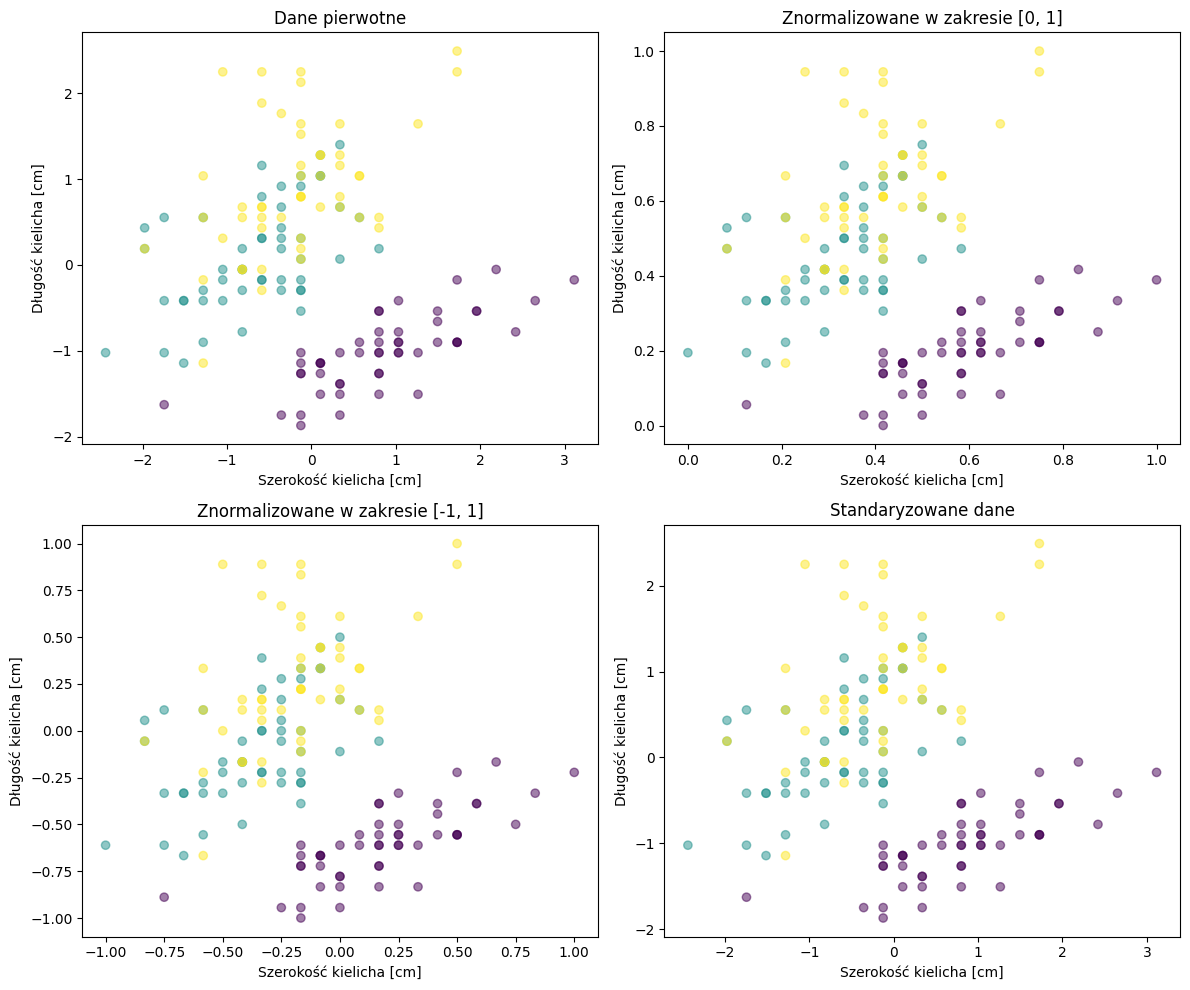

In [10]:
# Tworzenie figury z 4 wykresami
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Dane pierwotne
axs[0, 0].scatter(df['sepal_width'], df['sepal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 0].set_title('Dane pierwotne')
axs[0, 0].set_xlabel('Szerokość kielicha [cm]')
axs[0, 0].set_ylabel('Długość kielicha [cm]')

# Znormalizowane dane w zakresie [0, 1]
scaler_01 = MinMaxScaler(feature_range=(0, 1))
df_01 = df.copy()
df_01[kolumny_do_normalizacji] = scaler_01.fit_transform(df_01[kolumny_do_normalizacji])

axs[0, 1].scatter(df_01['sepal_width'], df_01['sepal_length'], c=df_01['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[0, 1].set_title('Znormalizowane w zakresie [0, 1]')
axs[0, 1].set_xlabel('Szerokość kielicha [cm]')
axs[0, 1].set_ylabel('Długość kielicha [cm]')

# Znormalizowane dane w zakresie [-1, 1]
scaler_neg_1_1 = MinMaxScaler(feature_range=(-1, 1))
df_neg_1_1 = df.copy()
df_neg_1_1[kolumny_do_normalizacji] = scaler_neg_1_1.fit_transform(df_neg_1_1[kolumny_do_normalizacji])

axs[1, 0].scatter(df_neg_1_1['sepal_width'], df_neg_1_1['sepal_length'], c=df_neg_1_1['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 0].set_title('Znormalizowane w zakresie [-1, 1]')
axs[1, 0].set_xlabel('Szerokość kielicha [cm]')
axs[1, 0].set_ylabel('Długość kielicha [cm]')

# Standaryzowane dane
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[kolumny_do_normalizacji] = scaler.fit_transform(df_standardized[kolumny_do_normalizacji])

axs[1, 1].scatter(df_standardized['sepal_width'], df_standardized['sepal_length'], c=df_standardized['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
axs[1, 1].set_title('Standaryzowane dane')
axs[1, 1].set_xlabel('Szerokość kielicha [cm]')
axs[1, 1].set_ylabel('Długość kielicha [cm]')

# Ustawienia layoutu
plt.tight_layout()
plt.show()

Zbiór danych dotyczy serii zarejestrowanych pomiarów w postaci widm Ramana w czasie.
Widmo Ramana to wykres intensywności rozproszonego promieniowania Ramana w
funkcji różnicy częstotliwości w stosunku do promieniowania padającego. W pierwszym
wierszu znajdują się jednostki (Wavenumber [cm^-1], Intensity [a.u.]), w drugim
oznaczenia kolejnych pomiarów, ti. Pierwsza kolumna odnosi się do zakresu pomiarowego,
w którym rejestrowane były widma (oś horyzontalna). Pozostałe kolumny odnoszą się do
poszczególnych pomiarów. Należy wykonać następujące operacje:

In [11]:
df1 = pd.read_csv('Zad2_L1.csv', sep=';', decimal=',')

2.1. Przeprowadzić normalizację danych: każde widmo należy znormalizować do
amplitudy pasma przy 985 cm-1

(z wyłączeniem kolumny Wavenumber [cm^-1]).

In [12]:
# Wyszukiwanie wiersza z wartością Wavenumber najbliższą 985 cm^-1
target_wavenumber = 985
idx_near_985 = (df1['Wavenumber [cm^-1]'] - target_wavenumber).abs().idxmin()

# Wartości intensywności przy liczbie falowej 985 cm^-1
intensity_at_985 = df1.loc[idx_near_985, df1.columns[1:]]

df1_normalized = df1.copy()
df1_normalized.iloc[:, 1:] = df1.iloc[:, 1:].div(intensity_at_985)

# Wyświetlenie znormalizowanych danych
print(df1_normalized)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

2.2. Narysować wykres zbiorczy składający się z 2 wykresów: widma dla danych
surowych oraz widma znormalizowane.

In [ ]:
df1.columns = ['Wavenumber [cm^-1]', 't0', 't1', 't2', 't3', 't4', 't5']

# Sprawdzenie poprawności po wczytaniu
print("Pierwsze kilka wierszy danych po wczytaniu i pominięciu pierwszego wiersza:")
print(df1.head())

# Normalizacja danych do amplitudy przy 985 cm^-1
wavenumber_target = 985
# Znajdź indeks najbliższy 985 cm^-1
idx_near_985 = (df1['Wavenumber [cm^-1]'] - wavenumber_target).abs().idxmin()

# Amplituda dla danych przy 985 cm^-1
intensity_at_985 = df1.iloc[idx_near_985, 1:]

# Normalizacja
df1_normalized = df1.copy()
df1_normalized.iloc[:, 1:] = df1_normalized.iloc[:, 1:].div(intensity_at_985.values)

# Wykresy
plt.figure(figsize=(14, 8))

# Surowe dane
plt.subplot(2, 1, 1)
for column in df1.columns[1:]:
    plt.plot(df1['Wavenumber [cm^-1]'], df1[column], label=column)
plt.title('Surowe Widma Ramana')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

# Znormalizowane dane
plt.subplot(2, 1, 2)
for column in df1_normalized.columns[1:]:
    plt.plot(df1_normalized['Wavenumber [cm^-1]'], df1_normalized[column], label=f'Normalized {column}')
plt.title('Znormalizowane Widma Ramana')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Normalized Intensity [a.u.]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2.3. Jaka jest przyczyna zastosowania powyższego sposobu normalizacji?

Przyczyny zastosowania normalizacji do amplitudy przy 985 cm⁻¹:

Porównywalność widm: Normalizacja umożliwia porównanie intensywności różnych widm na tej samej skali, co ułatwia identyfikację różnic.

Eliminacja wpływu warunków pomiarowych: Pomaga zredukować zmienne związane z różnymi warunkami eksperymentalnymi, co poprawia interpretację wyników.

Skupienie na kształcie widma: Umożliwia analizę relacji między intensywnościami pików, co jest kluczowe w analizach chemicznych.

Ułatwienie dalszej analizy: Normalizacja przygotowuje dane do zaawansowanych metod statystycznych, które lepiej działają na znormalizowanych danych.

Identyfikacja anomalii: Ułatwia zauważenie nietypowych zmian, które mogą wskazywać na interesujące zjawiska chemiczne.